## Feature Analysis 

1. t-SNE
2. Cluster Analysis

Goals:

1. Hopefully find a relationship b/t the features and the final scores.

In [10]:
import sys
sys.path.append('../')
import libs.utils as utils
import libs.feature_analysis as fa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import seaborn as sns
from sklearn.manifold import TSNE
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [3]:
df = pd.read_csv('../datasets/features/asag_v1_en.csv', sep='~')
df1_en = pd.read_csv('../datasets/normal/asag_v1_en.csv', sep='~')
df.head(3)

cols = df.columns.tolist()
cols.remove('GID')
cols.remove('Score')

bdf_orig = df[cols]
bdf_orig.head(2)

Bleu_Score        ED    POS_ED  DepParse_ED  Tree_ED  Tkn_Cosine  \
0   2.272393e-32  0.857143  0.714286     0.785714     34.0     0.53936   
1  2.172090e-124  0.750000  0.583333     0.583333     92.0     0.40452   

    NGram_1   NGram_2   NGram_3   BoW_Cos   BoW_JSD  Length_Diff       WMD  \
0  0.315789  0.598408  0.630957  0.381385  0.380280          -14  2.077197   
1  0.250000  0.333333  0.000000  0.478091  0.395186          -10  2.250237   

   Vec_Cosine    KB_WUP    KB_JNC  
0    0.734018  1.076923  1.000000  
1    0.717958  0.917904  0.590004

In [6]:
scores = df1_en['Score4']
scores_3c = df1_en['Score3']
scores_2c = df1_en['Score2']

In [8]:
bdf = bdf_orig.copy()
bdf = bdf.replace([np.inf, -np.inf], np.nan)
bdf['Tkn_Cosine'] = bdf['Tkn_Cosine'].fillna(0.0)
bdf['WMD'] = bdf['WMD'].fillna(0.0)

# Normalize
bdf['Tree_ED'] = utils.min_max_normalization(bdf['Tree_ED'].as_matrix())
bdf['Length_Diff'] = utils.min_max_normalization(bdf['Length_Diff'].as_matrix())

In [9]:
cmp = bdf.copy()
cmp['Score'] = scores
cmp['Score3'] = scores_3c
cmp['Score2'] = scores_2c
cmp['GID'] = df1_en['GID']
cmp.head(2)

Bleu_Score        ED    POS_ED  DepParse_ED   Tree_ED  Tkn_Cosine  \
0   2.272393e-32  0.857143  0.714286     0.785714  0.172589     0.53936   
1  2.172090e-124  0.750000  0.583333     0.583333  0.467005     0.40452   

    NGram_1   NGram_2   NGram_3   BoW_Cos   BoW_JSD  Length_Diff       WMD  \
0  0.315789  0.598408  0.630957  0.381385  0.380280     0.750000  2.077197   
1  0.250000  0.333333  0.000000  0.478091  0.395186     0.777778  2.250237   

   Vec_Cosine    KB_WUP    KB_JNC  Score  Score3  Score2  GID  
0    0.734018  1.076923  1.000000    2.0     2.0     1.0  1.1  
1    0.717958  0.917904  0.590004    1.0     1.0     1.0  1.1

## 1.1 All Features

In [32]:
#kept_idxs = ~cmp['GID'].isin(['1.2', '2.5', '3.3'])
fs_all = cmp[['NGram_1','Tree_ED', 'Tkn_Cosine', 'Length_Diff', 'WMD', 'Vec_Cosine']]

# default perplexity is: 30

res1 = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(fs_all)

#idxs = np.logical_and(res1[:, 0] > -20, res1[:, 1] > 40)
#df[idxs]['GID'].unique()
#scatter(res1, scores_3c,labels=['All Features (3-Classes)'])
#plt.show()
#scatter(res1, scores_2c,labels=['All Features (2-Classes)'])

In [34]:
fa.plot_tsne(res1, scores, labels=['All Features'])

In [30]:
reload(fa)
display(df1_en[kept_idxs][fa.select_indexes_from_tsne(res1, [10,50], [-50,-20])])
display(cmp[kept_idxs][fa.select_indexes_from_tsne(res1, [10,50], [-50,-20])])
print(res1)

AID  QID                                             Prompt  \
6      1    1            What does a function signature include?   
7      1    1            What does a function signature include?   
17     1    1            What does a function signature include?   
75     1    3     How does the compiler handle inline functions?   
79     1    3     How does the compiler handle inline functions?   
84     1    3     How does the compiler handle inline functions?   
89     1    3     How does the compiler handle inline functions?   
99     1    4  What is the main advantage associated with fun...   
114    1    4  What is the main advantage associated with fun...   
129    1    5  How are overloaded functions differentiated by...   
133    1    5  How are overloaded functions differentiated by...   
136    1    5  How are overloaded functions differentiated by...   
137    1    5  How are overloaded functions differentiated by...   
138    1    5  How are overloaded functions differentiated by...   
141    1    5  How are overloaded functions differentiated by...   
142    1    5  How are overloaded functions differentiated by...   
143    1    5  How are overloaded functions differentiated by...   
144    1    5  How are overloaded functions differentiated by...   
148    1    5  How are overloaded functions differentiated by...   
150    1    5  How are overloaded functions differentiated by...   
151    1    5  How are overloaded functions differentiated by...   
152    1    5  How are overloaded functions differentiated by...   
153    1    5  How are overloaded functions differentiated by...   
160    1    6  When defining a recursive function, what are p...   
162    1    6  When defining a recursive function, what are p...   
182    1    6  When defining a recursive function, what are p...   
184    1    6  When defining a recursive function, what are p...   
194    1    7  What are the similarities between iteration an...   
198    1    7  What are the similarities between iteration an...   
203    1    7  What are the similarities between iteration an...   
..   ...  ...                                                ...   
474    3    2  What stages in the software life cycle are inf...   
476    3    2  What stages in the software life cycle are inf...   
477    3    2  What stages in the software life cycle are inf...   
478    3    2  What stages in the software life cycle are inf...   
479    3    2  What stages in the software life cycle are inf...   
480    3    2  What stages in the software life cycle are inf...   
483    3    2  What stages in the software life cycle are inf...   
516    3    4            Where do C++ programs begin to execute?   
519    3    4            Where do C++ programs begin to execute?   
520    3    4            Where do C++ programs begin to execute?   
521    3    4            Where do C++ programs begin to execute?   
523    3    4            Where do C++ programs begin to execute?   
525    3    4            Where do C++ programs begin to execute?   
526    3    4            Where do C++ programs begin to execute?   
528    3    4            Where do C++ programs begin to execute?   
533    3    4            Where do C++ programs begin to execute?   
535    3    4            Where do C++ programs begin to execute?   
537    3    4            Where do C++ programs begin to execute?   
538    3    4            Where do C++ programs begin to execute?   
560    3    5                                What is a variable?   
561    3    5                                What is a variable?   
580    3    6     Where are variables declared in a C++ program?   
583    3    6     Where are variables declared in a C++ program?   
584    3    6     Where are variables declared in a C++ program?   
591    3    6     Where are variables declared in a C++ program?   
592    3    6     Where are variables declared in a C++ program?   
593    3    6     Where are variables declared in a C++ progr

Bleu_Score        ED    POS_ED  DepParse_ED   Tree_ED  Tkn_Cosine  \
6    2.715112e-124  0.812500  0.687500     0.812500  0.152284    0.597614   
7    5.213016e-124  0.800000  0.000000     0.800000  0.182741    0.600000   
17   5.213016e-124  0.800000  0.000000     0.800000  0.126904    0.600000   
75   9.693175e-125  0.800000  0.700000     0.600000  0.304569    0.408248   
79    0.000000e+00  1.000000  0.900000     0.900000  0.335025    0.000000   
84    0.000000e+00  1.000000  0.800000     0.700000  0.335025    0.000000   
89   2.808424e-125  0.900000  0.700000     0.700000  0.304569    0.204124   
99    1.768887e-32  0.777778  0.555556     0.555556  0.233503    0.333333   
114  9.584313e-125  1.000000  0.666667     0.777778  0.335025    0.117851   
129  2.974535e-125  0.941176  0.705882     0.705882  0.208122    0.113961   
133   8.742318e-34  0.882353  0.823529     0.882353  0.060914    0.348155   
136   0.000000e+00  1.000000  0.941176     0.941176  0.116751    0.000000   
137   0.000000e+00  1.000000  0.647059     0.764706  0.279188    0.000000   
138   5.286588e-02  0.823529  0.647059     0.647059  0.253807    0.369274   
141   8.742318e-34  0.882353  0.823529     0.882353  0.071066    0.348155   
142   0.000000e+00  1.000000  0.764706     0.823529  0.177665    0.000000   
143   8.742318e-34  0.882353  0.823529     0.764706  0.060914    0.348155   
144   0.000000e+00  1.000000  0.764706     0.764706  0.192893    0.000000   
148   0.000000e+00  1.000000  0.705882     0.764706  0.223350    0.000000   
150   0.000000e+00  1.000000  0.941176     0.941176  0.131980    0.000000   
151   0.000000e+00  1.000000  0.764706     0.823529  0.238579    0.000000   
152   0.000000e+00  1.000000  0.823529     0.823529  0.157360    0.000000   
153  2.315154e-125  0.941176  0.647059     0.823529  0.182741    0.123091   
160   2.301979e-32  0.818182  0.636364     0.818182  0.335025    0.424264   
162  3.774526e-125  0.909091  0.727273     0.818182  0.314721    0.158114   
182   1.645450e-32  0.818182  0.545455     0.727273  0.314721    0.258199   
184   2.339431e-01  0.636364  0.363636     0.454545  0.258883    0.478091   
194  7.807863e-125  0.888889  0.666667     0.777778  0.335025    0.169031   
198   0.000000e+00  1.000000  0.888889     0.888889  0.411168    0.000000   
203  7.807863e-125  0.888889  0.555556     0.777778  0.441624    0.169031   
..             ...       ...       ...          ...       ...         ...   
474  2.289366e-125  0.923077  0.692308     0.769231  0.472081    0.158114   
476  2.289366e-125  0.923077  0.692308     0.769231  0.441624    0.158114   
477  1.033162e-125  0.923077  0.769231     0.769231  0.411168    0.182574   
478   0.000000e+00  1.000000  0.769231     0.846154  0.461929    0.000000   
479  6.585404e-125  1.000000  0.692308     0.692308  0.497462    0.105409   
480   0.000000e+00  1.000000  0.692308     0.846154  0.472081    0.000000   
483   0.000000e+00  1.000000  0.923077     0.923077  0.441624    0.000000   
516  1.448060e-124  0.833333  0.666667     0.500000  0.162437    0.288675   
519  4.344180e-124  1.000000  0.666667     0.666667  0.086294    0.500000   
520  4.344180e-124  0.500000  0.333333     0.666667  0.060914    0.500000   
521   0.000000e+00  1.000000  0.333333     0.333333  0.081218    0.000000   
523  3.196269e-124  0.500000  0.666667     0.666667  0.071066    0.707107   
525  4.344180e-124  0.500000  0.333333     0.666667  0.050761    0.500000   
526   0.000000e+00  1.000000  0.333333     0.333333  0.060914    0.000000   
528  1.737672e-124  1.000000  0.800000     0.600000  0.152284    0.316228   
533  8.688359e-125  0.900000  0.800000     0.900000  0.350254    0.223607   
535  3.196269e-124  0.500000  0.666667     0.666667  0.071066    0.707107   
537  3.196269e-124  0.500000  0.333333     0.333333  0.060914    0.707107   
538  2.172090e-124  1.000000  1.000000     0.500000  0.096447    0.353553   
560   0.000000e+00  1.000000  0.878788     0.939394  0.857868    0.000000   
561 

[[  1.2346439 -10.93304  ]
 [ 11.396906  -10.1492815]
 [ -8.97384   -11.106108 ]
 ...
 [-12.738537   22.296703 ]
 [  7.20298    11.259496 ]
 [-11.232036   25.31675  ]]


## 1.2 Token Based Features

In [35]:
token_cols = ['Tkn_Cosine', 'NGram_1','NGram_2','NGram_3', 'BoW_Cos', 'BoW_JSD']
fs_tokens = bdf[token_cols].as_matrix() 

# res2 = TSNE(n_components=2, random_state=42, perplexity=35).fit_transform(fs_tokens)
idx2 = res2[:, 0] < -30
display(df[idx2]['GID'].unique())
df1_en[idx2]

array([1.2, 1.3, 1.5, 1.7, 2.1, 2.4, 2.5, 2.7, 3.2, 3.3, 3.7])

AID  QID                                             Prompt  \
38     1    2             What is the scope of global variables?   
40     1    2             What is the scope of global variables?   
43     1    2             What is the scope of global variables?   
44     1    2             What is the scope of global variables?   
47     1    2             What is the scope of global variables?   
48     1    2             What is the scope of global variables?   
50     1    2             What is the scope of global variables?   
52     1    2             What is the scope of global variables?   
53     1    2             What is the scope of global variables?   
54     1    2             What is the scope of global variables?   
56     1    2             What is the scope of global variables?   
57     1    2             What is the scope of global variables?   
61     1    2             What is the scope of global variables?   
79     1    3     How does the compiler handle inline functions?   
84     1    3     How does the compiler handle inline functions?   
136    1    5  How are overloaded functions differentiated by...   
150    1    5  How are overloaded functions differentiated by...   
198    1    7  What are the similarities between iteration an...   
222    2    1  What is typically included in a class definition?   
308    2    4        When does C++ create a default constructor?   
337    2    5  How many constructors can be created for a class?   
338    2    5  How many constructors can be created for a class?   
340    2    5  How many constructors can be created for a class?   
341    2    5  How many constructors can be created for a class?   
344    2    5  How many constructors can be created for a class?   
345    2    5  How many constructors can be created for a class?   
346    2    5  How many constructors can be created for a class?   
347    2    5  How many constructors can be created for a class?   
348    2    5  How many constructors can be created for a class?   
349    2    5  How many constructors can be created for a class?   
350    2    5  How many constructors can be created for a class?   
354    2    5  How many constructors can be created for a class?   
355    2    5  How many constructors can be created for a class?   
356    2    5  How many constructors can be created for a class?   
357    2    5  How many constructors can be created for a class?   
358    2    5  How many constructors can be created for a class?   
359    2    5  How many constructors can be created for a class?   
361    2    5  How many constructors can be created for a class?   
362    2    5  How many constructors can be created for a class?   
363    2    5  How many constructors can be created for a class?   
364    2    5  How many constructors can be created for a class?   
365    2    5  How many constructors can be created for a class?   
366    2    5  How many constructors can be created for a class?   
400    2    7                 What is the role of a header-file?   
420    2    7                 What is the role of a header-file?   
426    2    7                 What is the role of a header-file?   
462    3    2  What stages in the software life cycle are inf...   
464    3    2  What stages in the software life cycle are inf...   
468    3    2  What stages in the software life cycle are inf...   
469    3    2  What stages in the software life cycle are inf...   
478    3    2  What stages in the software life cycle are inf...   
480    3    2  What stages in the software life cycle are inf...   
483    3    2  What stages in the software life cycle are inf...   
491    3    3  What are the main advantages associated with o...   
493    3    3  What are the main advantages associated with o...   
497    3    3  What are the main advantages associated with o...   
498    3    3  What are the main advantages associated with o...   
503    3    3  What are the main advantages associated with o

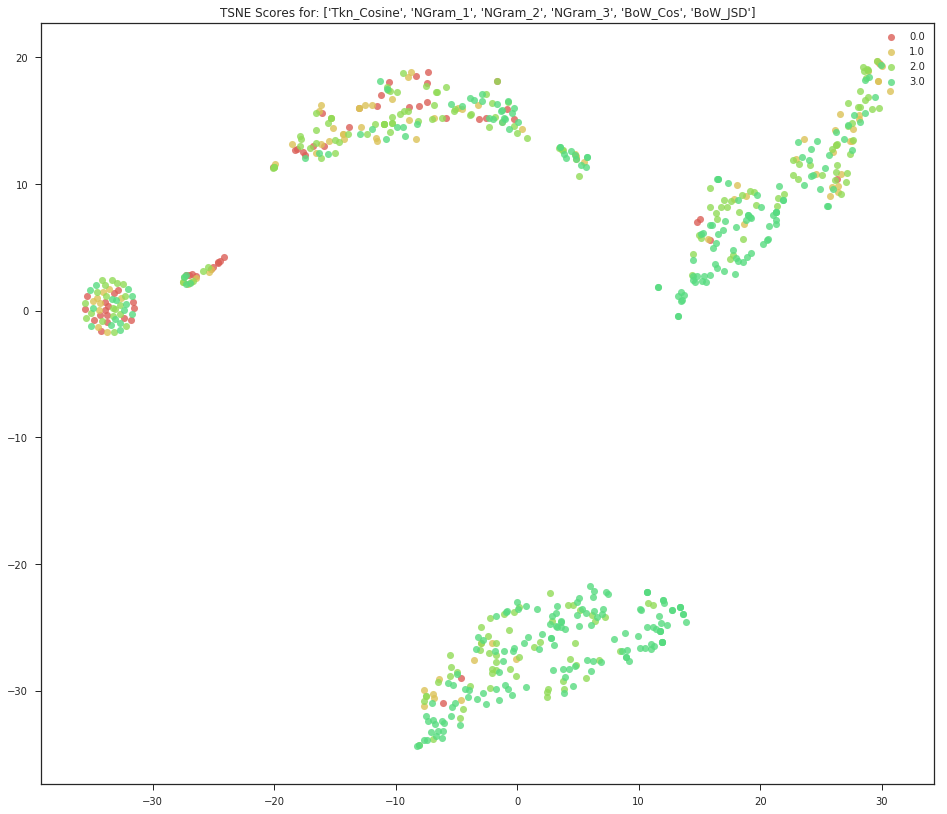

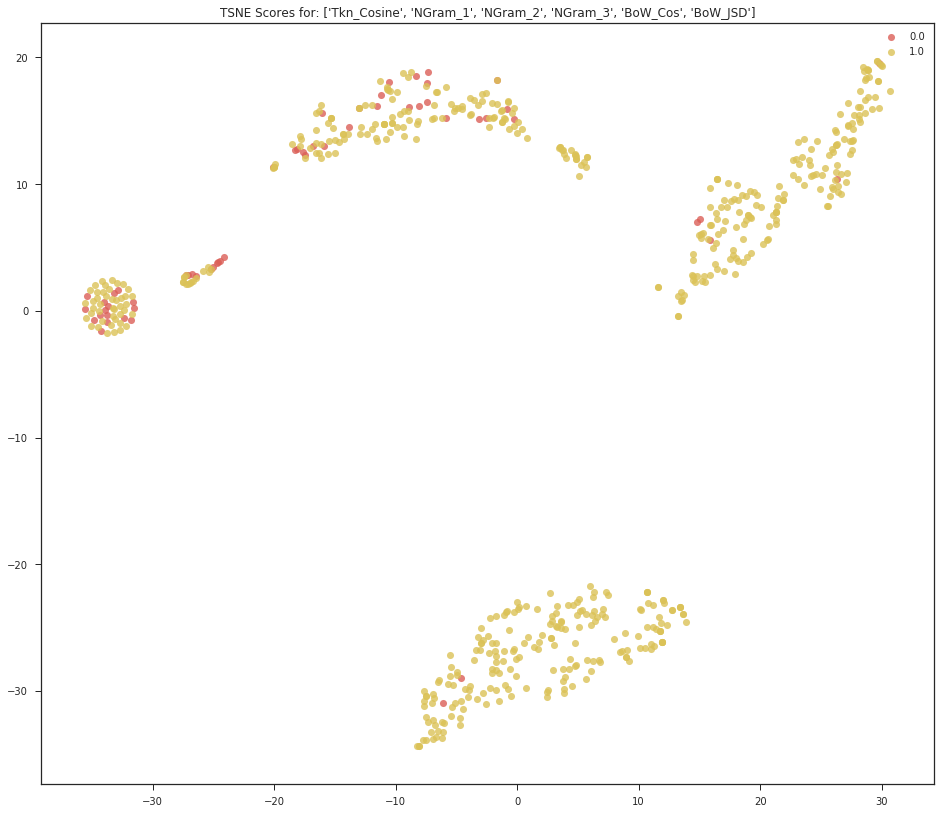

In [28]:
scatter(res2, scores, labels=token_cols)
plt.show()
scatter(res2, scores_3c, labels=token_cols)
plt.show()
scatter(res2, scores_2c, labels=token_cols)

In [177]:
sns.pairplot(cmp[token_cols + ['Score', 'Score3', 'Score2']])

## 1.3 Semantic Features

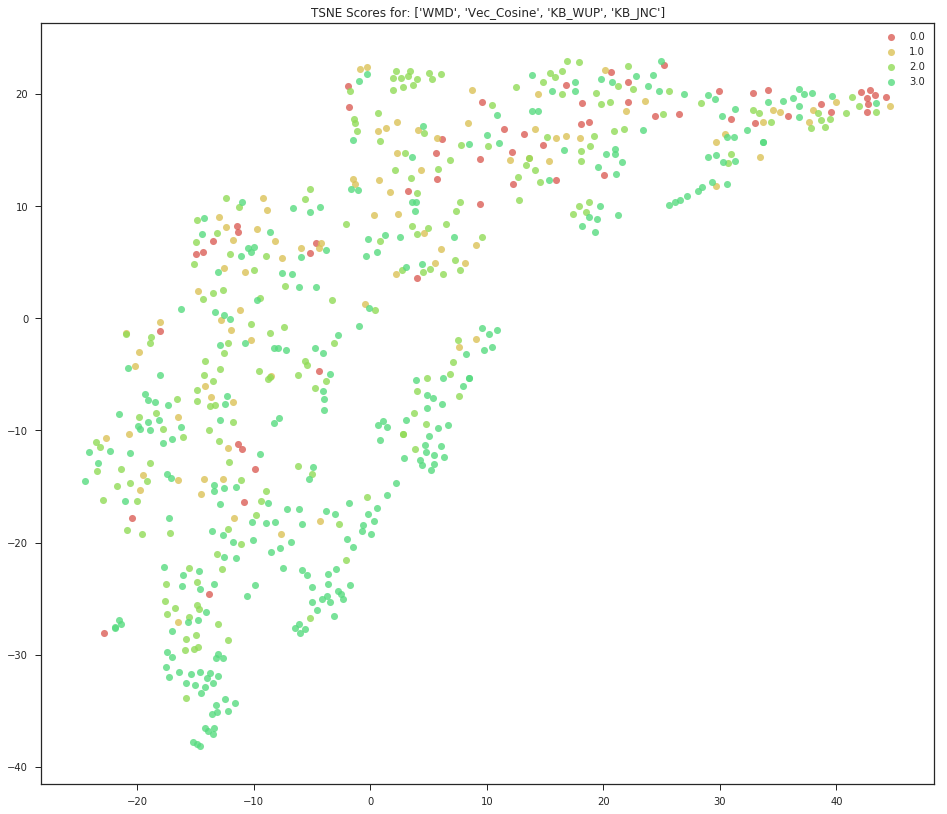

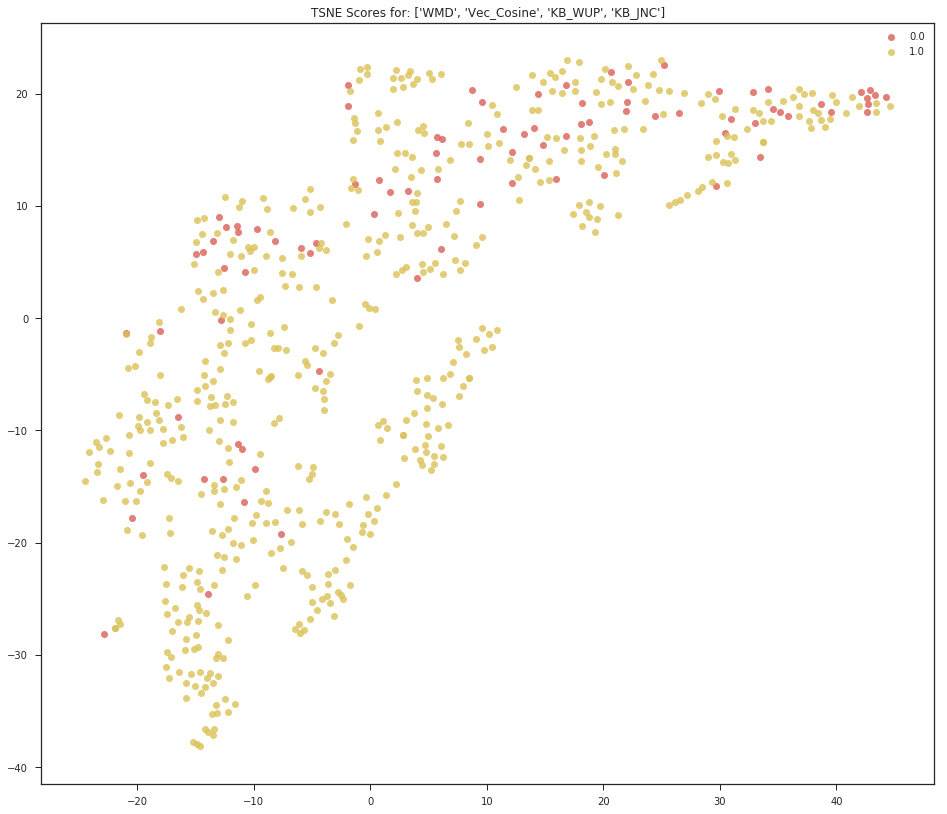

In [29]:
semantic_cols = ['WMD', 'Vec_Cosine', 'KB_WUP', 'KB_JNC']
fs_semantic = bdf[semantic_cols].as_matrix()


res3 = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(fs_semantic)
scatter(res3, scores, labels=semantic_cols)
plt.show()
scatter(res3, scores_3c, labels=semantic_cols)
plt.show()
scatter(res3, scores_2c, labels=semantic_cols)
plt.show()

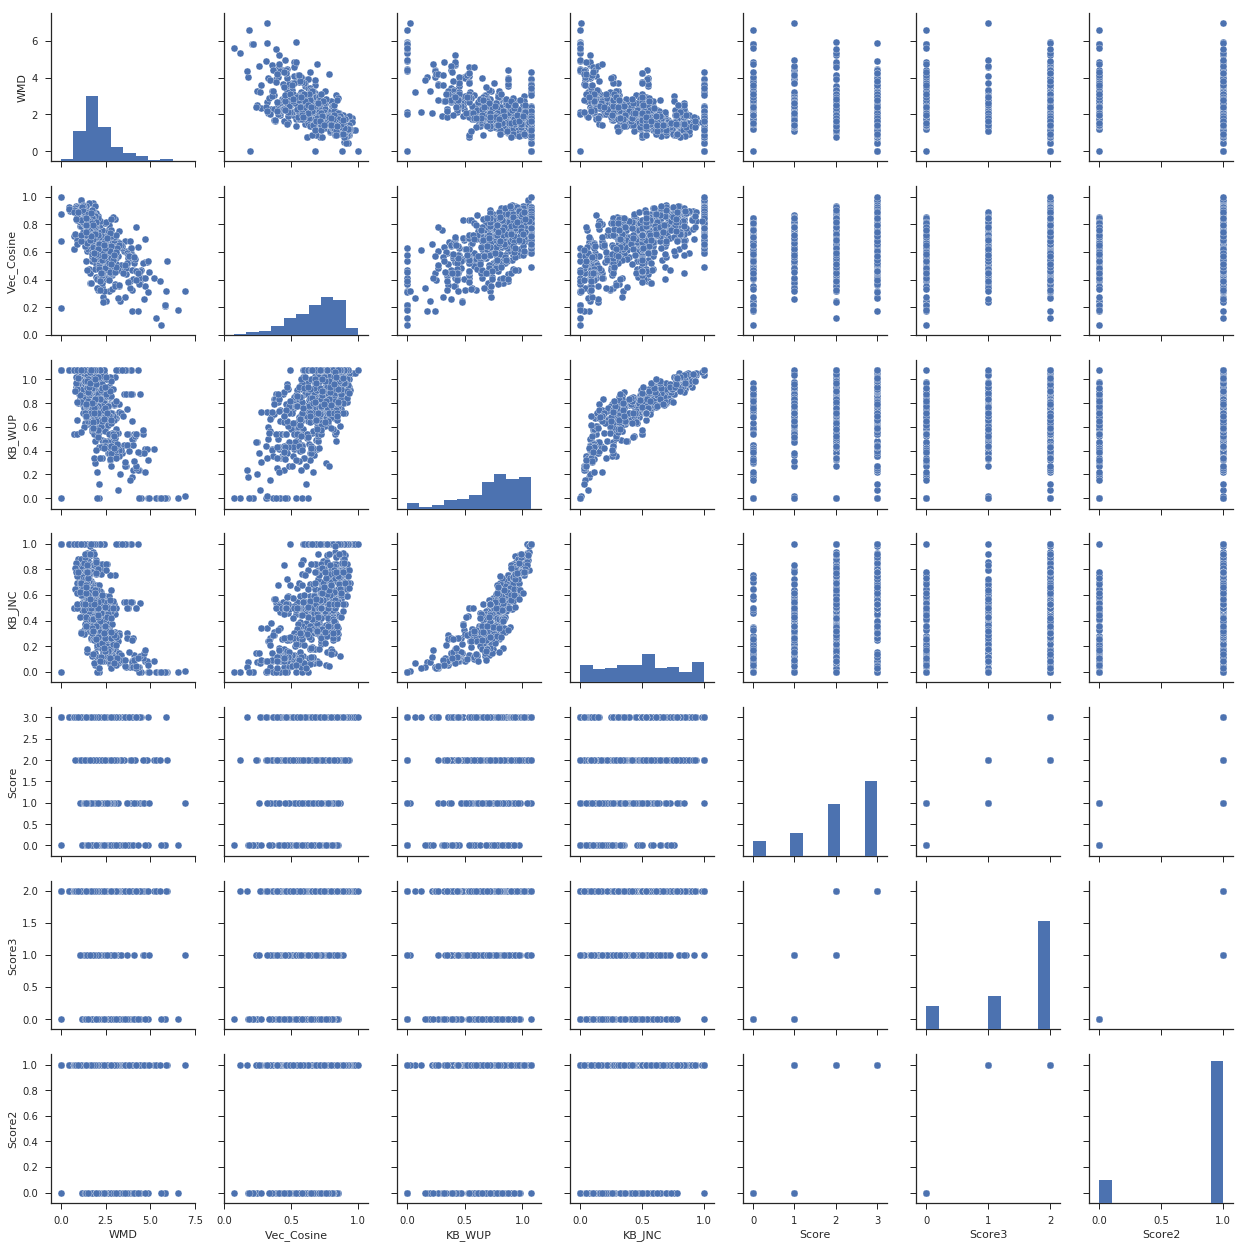

In [179]:
sns.pairplot(cmp[semantic_cols + ['Score', 'Score3', 'Score2']])

## 1.4 Syntax Features

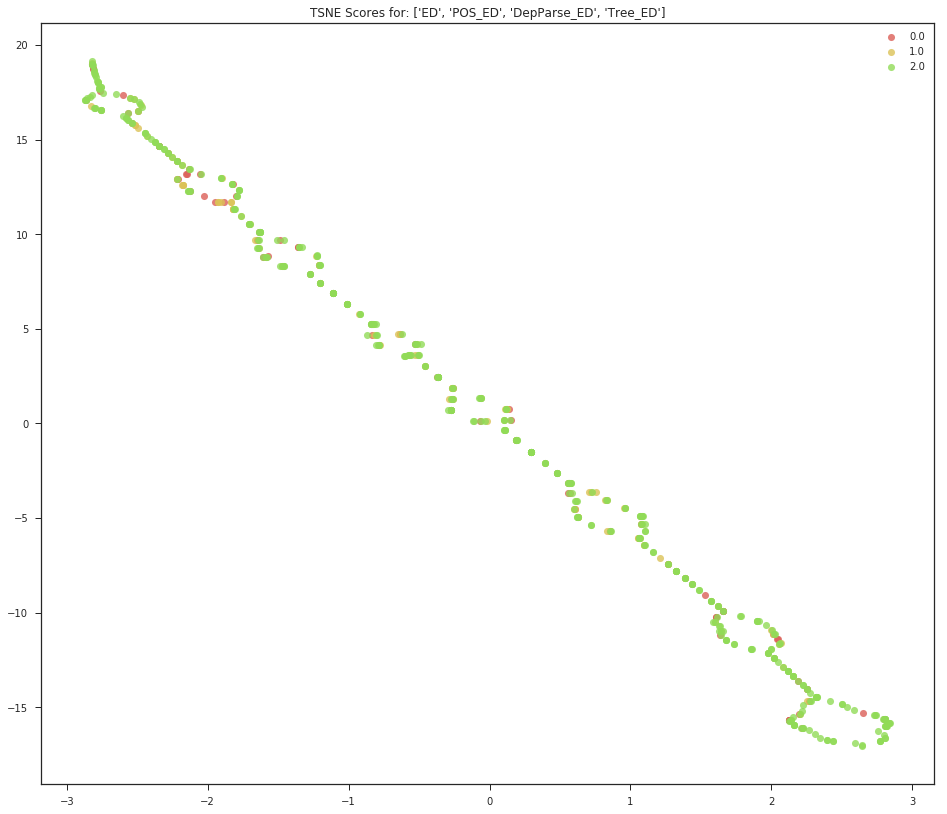

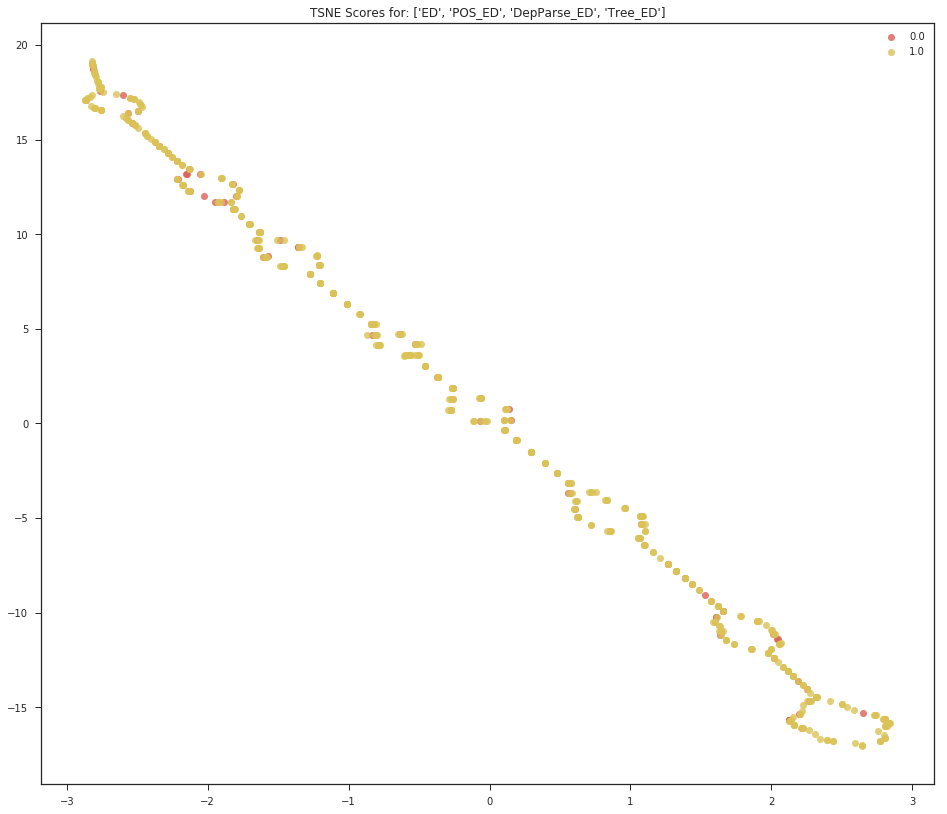

In [35]:
syntax_cols = ['ED','POS_ED','DepParse_ED','Tree_ED']
fs_syntax = bdf[syntax_cols].as_matrix()

# bdf[bdf['WMD'] > 100]
res4 = TSNE(n_components=2, random_state=42, perplexity=100).fit_transform(fs_syntax)
scatter(res4, scores, labels=syntax_cols)
plt.show()
scatter(res4, scores_3c, labels=syntax_cols)
plt.show()
scatter(res4, scores_2c, labels=syntax_cols)
plt.show()

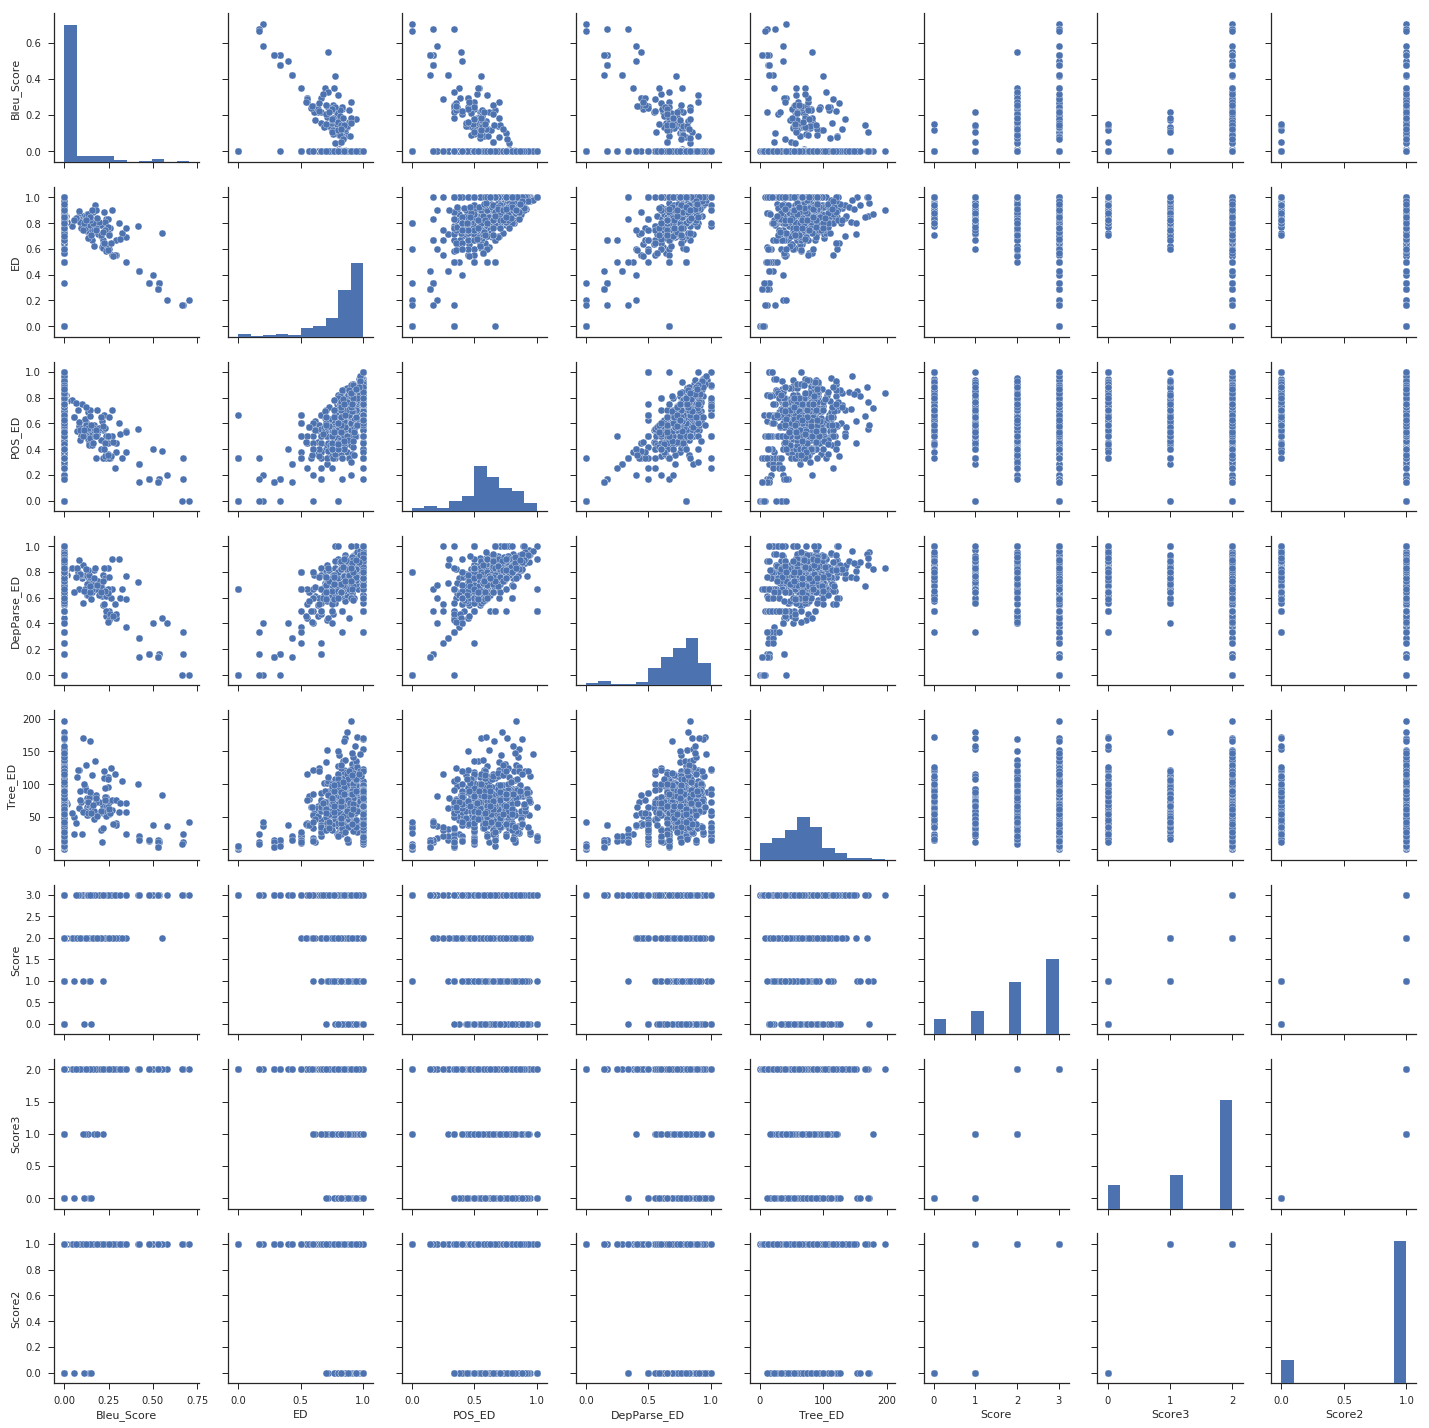

In [181]:
sns.pairplot(cmp[syntax_cols + ['Score', 'Score3', 'Score2']])